# Data import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('.\\mhealth_raw_data.csv')

In [3]:
data.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


# # Pre-processing

In [5]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop subject column
    df = df.drop('subject', axis=1)
    
    # Sample 2000 examples from each class
    samples = []
    for category in df['Activity'].unique():
        category_slice = df.query("Activity == @category")
        samples.append(category_slice.sample(2000, random_state=1))
    df = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
    
    # Split df into X and y
    y = df['Activity']
    X = df.drop('Activity', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [7]:
X_train.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
11053,0.187104,0.006277,-0.228013,-1.505719,-0.704517,0.614794,0.429857,-0.326943,-0.339706,-1.321750,-0.160711,-1.172536
12600,0.012679,-0.068988,-0.629651,0.902903,1.395136,-0.902048,0.000880,-1.372901,0.030727,1.367656,-0.637630,0.102802
7364,-0.738023,-0.330316,-0.073460,-0.121955,-0.650918,0.948702,1.092318,-0.166351,0.936759,1.600883,0.154742,1.141817
4806,-0.308225,-0.369919,0.017368,1.034512,-0.440953,0.579264,-0.098113,-0.486392,-0.255824,-0.811564,-0.434833,0.514347
19271,-0.037292,-0.133830,-0.040404,1.273764,-0.311398,0.245348,0.103261,0.076830,-0.345337,-0.053581,-0.675176,0.836221


In [8]:
y_train.value_counts()

11    1434
3     1424
5     1418
12    1417
10    1406
8     1405
0     1398
7     1392
1     1388
9     1383
4     1382
6     1377
2     1376
Name: Activity, dtype: int64

# kneighbors

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import time
n_neighbors = 3
Tstart = time.perf_counter()
KNeighbors = KNeighborsClassifier(n_neighbors = int(n_neighbors) )
KNeighbors.fit(X_train, y_train)
y_pred_knn=KNeighbors.predict(X_test)
diff_vec_knn = y_pred_knn != y_test
err = int(1000*sum(diff_vec_knn)/len(y_pred_knn))/10
Tend = time.perf_counter()
time_taken_knn = int(Tend - Tstart)
print("KNeighborsC: N", int(n_neighbors), "error", err, "%, Tcalc=",time_taken_knn, "sec")

KNeighborsC: N 3 error 8.6 %, Tcalc= 2 sec


In [10]:
from sklearn.metrics import accuracy_score
print('precision_score:',precision_score(y_test, y_pred_knn, average='weighted'))
print('recall_score:',recall_score(y_test, y_pred_knn, average='weighted'))
print('accuracy_score:',accuracy_score(y_test, y_pred_knn))
print('f1_score:',f1_score(y_test, y_pred_knn, average='weighted'))
print("\nConfusion Matrix\n")
print(confusion_matrix(y_test, y_pred_knn))

precision_score: 0.9113643771992824
recall_score: 0.9138461538461539
accuracy_score: 0.9138461538461539
f1_score: 0.9079935268910522

Confusion Matrix

[[283  15  12   4  57  40  36  38  46  36  14   9  12]
 [  0 612   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 624   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 576   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0 607   1   1   0   2   0   0   0   0]
 [ 21   1   0   0  25 512   3   2  17   1   0   0   0]
 [  1   2   0   0   0   0 617   1   2   0   0   0   0]
 [  1   0   0   0   0   0  12 592   3   0   0   0   0]
 [  2   1   0   0   1   0   3   8 579   0   1   0   0]
 [  1   0   0   0   0   1   0   1   0 613   0   0   1]
 [  7   0   1   0   2   0   0   0   0   0 535  32  17]
 [  7   0   2   0   3   0   0   1   0   0  47 495  11]
 [ 16   0   0   0   5   6   0   3   6   0  37  27 483]]


In [19]:
# Choosing the best parameter for KNN
k_range = list(range(1, 15))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

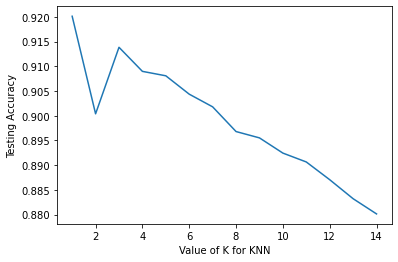

In [20]:
# Plotting the best parameter
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
import time
C = 1000
Tstart = time.perf_counter()
logistic_regression = LogisticRegression(max_iter=50000, C=C,random_state=0)
logistic_regression.fit(X_train,y_train)
y_pred_log=logistic_regression.predict(X_test)
diff_vec_log = y_pred_log != y_test
err = int(1000*sum(diff_vec_log)/len(y_pred_log))/10
Tend = time.perf_counter()
time_taken_log = int(Tend - Tstart)
print("LogisticRegression: C:{}, error:{}%, Time taken:{}secs".format(C,err,time_taken_log))

LogisticRegression: C:1000, error:44.5%, Time taken:6secs


In [14]:
print('precision_score:',precision_score(y_test, y_pred_log, average='weighted'))
print('recall_score:',recall_score(y_test, y_pred_log, average='weighted'))
print('accuracy_score:',accuracy_score(y_test, y_pred_log))
print('f1_score:',f1_score(y_test, y_pred_log, average='weighted'))
print("\nConfusion Matrix\n")
print(confusion_matrix(y_test, y_pred_log))

precision_score: 0.5314883650888172
recall_score: 0.5548717948717948
accuracy_score: 0.5548717948717948
f1_score: 0.5358132879096394

Confusion Matrix

[[ 28  68  69   4  55  13  68  43  72  55  43  29  55]
 [  0 392   0   0  63   0 142   0  15   0   0   0   0]
 [  2   0 408   0   0  27   0  53   0  62   0  12  60]
 [  0   0   0 576   0   0   0   0   0   0   0   0   0]
 [  9  72   4   0 295  51  44   0 100   1   1  14  27]
 [ 41  41  36   1 107 168  38   9  82   9   7  12  31]
 [ 32 100   0   0  12   1 386   1  90   0   0   0   1]
 [ 14  57  57   7  21   1  46 346   2  47   0   3   7]
 [ 20  36   0   0  36  47  88   1 344   3   5   2  13]
 [  3   0   0   0   3   0   0  16  31 564   0   0   0]
 [ 13   0  36   2   3   8   1   9   2   0 327  98  95]
 [ 12   1  48   3   7  28  11   6  17   2  62 339  30]
 [ 27   6  42   1  30   3  35  42  16  11 121  94 155]]


# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
n_est = 800
max_d = 7
Tstart = time.perf_counter()
rf = RandomForestClassifier(n_estimators=int(n_est), max_depth=int(max_d), random_state=0)
rf.fit(X_train, y_train)
y_pred_rf =  rf.predict(X_test)
diff_vec_rf = y_pred_rf != y_test
err = int(1000*sum(diff_vec_rf)/len(y_pred_rf))/10
Tend = time.perf_counter()
time_taken_rf = int(Tend - Tstart)
print("RandomForestC", "n_est", n_est,"max_d", max_d ,"error", err, "%, Tcalc=",time_taken_rf, "sec")

RandomForestC n_est 800 max_d 7 error 21.6 %, Tcalc= 49 sec


In [17]:
print('precision_score:',precision_score(y_test, y_pred_rf, average='weighted'))
print('recall_score:',recall_score(y_test, y_pred_rf, average='weighted'))
print('accuracy_score:',accuracy_score(y_test, y_pred_rf))
print('f1_score:',f1_score(y_test, y_pred_rf, average='weighted'))
print("\nConfusion Matrix\n")
print(confusion_matrix(y_test, y_pred_rf))

precision_score: 0.8002599044617859
recall_score: 0.783974358974359
accuracy_score: 0.783974358974359
f1_score: 0.7659804489773449

Confusion Matrix

[[ 85  59  32   4  42  52  54  59  66  43  30  37  39]
 [  0 609   0   0   0   3   0   0   0   0   0   0   0]
 [  0   0 624   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 576   0   0   0   0   0   0   0   0   0]
 [  0  29   0   0 439  15  53  13  59   0   0  10   0]
 [  4   8   1   0  70 390  35   1  60   3   4   5   1]
 [  0  74   3   0   1  20 426   9  86   0   0   0   4]
 [  1  56   1   0   0   1  38 510   0   0   1   0   0]
 [  2  66   1   0   3  33  47   4 430   1   2   0   6]
 [  1   0   0   0   0   1   0   5   6 603   1   0   0]
 [  0   0   0   0   2   3   0   1   1   0 445 119  23]
 [  0   0   2   0   2   0   0   1   1   0  31 518  11]
 [  1   0   0   0  13   2   1   3   3   0  29  71 460]]


# Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
Tstart = time.perf_counter()
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
diff_vec_nb = y_pred_nb != y_test
err = int(1000*sum(diff_vec_nb)/len(y_pred_nb))/10
Tend = time.perf_counter()
time_taken_nb = int(Tend - Tstart)
print("Naive Bayes Classifier","error", err, "%, Tcalc=", time_taken_nb, "sec")

Naive Bayes Classifier error 34.5 %, Tcalc= 0 sec


In [22]:
print('precision_score:',precision_score(y_test, y_pred_nb, average='weighted'))
print('recall_score:',recall_score(y_test, y_pred_nb, average='weighted'))
print('accuracy_score:',accuracy_score(y_test, y_pred_nb))
print('f1_score:',f1_score(y_test, y_pred_nb, average='weighted'))
print("\nConfusion Matrix\n")
print(confusion_matrix(y_test, y_pred_nb))

precision_score: 0.655092899813951
recall_score: 0.655
accuracy_score: 0.655
f1_score: 0.6395383214551362

Confusion Matrix

[[ 96  55  63   4  39  34  69  66  58  29  35  29  25]
 [  0 567   0   0   0   0  45   0   0   0   0   0   0]
 [  0   0 340   0   0   0   4 158  60  62   0   0   0]
 [  0   0   0 576   0   0   0   0   0   0   0   0   0]
 [ 10  11   9   0 385  18  63  15  91   0   0  14   2]
 [ 24   9   9   0 114 264  23   2 120   7   1   6   3]
 [  1  65   1   0   3   2 520  15  16   0   0   0   0]
 [  0  39  14   0   2   0  74 478   0   0   1   0   0]
 [ 10  72   4   0   7  26 134   2 328   0   8   0   4]
 [ 38   0   7   0   1   1   0   3  38 529   0   0   0]
 [ 14   0   1   1   2   1   0   0   0   0 357 146  72]
 [  5   0   4   0   0   0   0   1   0   1  76 452  27]
 [ 67   0   4   0   7   0   0   2   2   0 131 153 217]]


# Training/Results

In [23]:
acc_knn = KNeighbors.score(X_test, y_test)
acc_lr = logistic_regression.score(X_test, y_test)
acc_rf = rf.score(X_test, y_test)
acc_nb = nb.score(X_test, y_test)
print("Test Accuracy: (KNearestNeighbour): {:.2f}%".format(acc_knn * 100))
print("Test Accuracy: (Logistic Regression): {:.2f}%".format(acc_lr * 100))
print("Test Accuracy: (Random Forest): {:.2f}%".format(acc_rf * 100))
print("Test Accuracy: (Naive Bayes): {:.2f}%".format(acc_nb * 100))

Test Accuracy: (KNearestNeighbour): 91.38%
Test Accuracy: (Logistic Regression): 55.49%
Test Accuracy: (Random Forest): 78.40%
Test Accuracy: (Naive Bayes): 65.50%


# Confusion Matrix

In [24]:
activity_labels = {
    0: "None",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)"
}

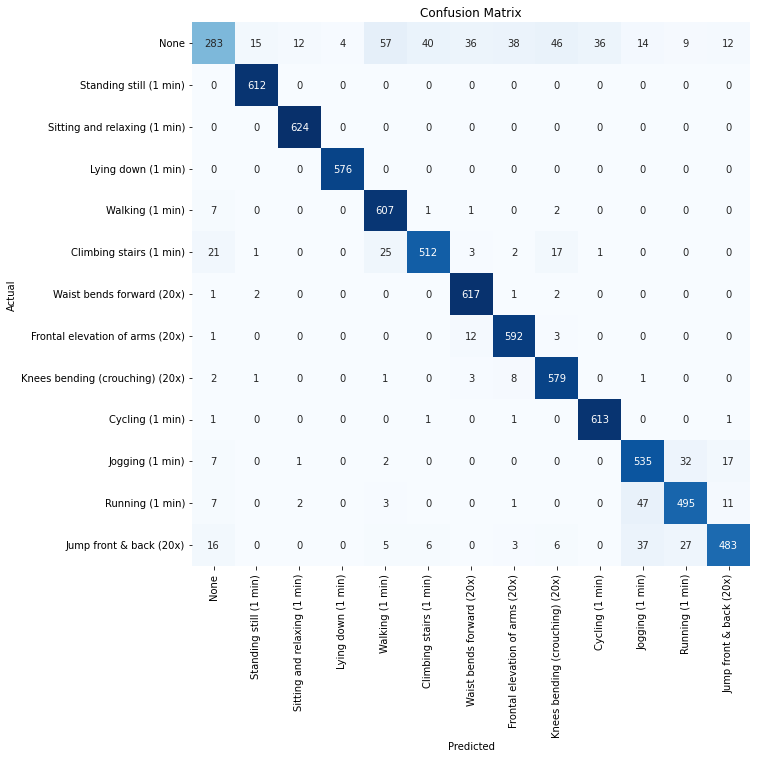

Classification Report:
----------------------
                                  precision    recall  f1-score   support

                           None       0.82      0.47      0.60       602
         Standing still (1 min)       0.97      1.00      0.98       612
   Sitting and relaxing (1 min)       0.98      1.00      0.99       624
             Lying down (1 min)       0.99      1.00      1.00       576
                Walking (1 min)       0.87      0.98      0.92       618
        Climbing stairs (1 min)       0.91      0.88      0.90       582
      Waist bends forward (20x)       0.92      0.99      0.95       623
Frontal elevation of arms (20x)       0.92      0.97      0.94       608
Knees bending (crouching) (20x)       0.88      0.97      0.93       595
                Cycling (1 min)       0.94      0.99      0.97       617
                Jogging (1 min)       0.84      0.90      0.87       594
                Running (1 min)       0.88      0.87      0.88       566
   

In [25]:
# KnearestNeighbour

y_pred = KNeighbors.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=list(range(13)))
clr = classification_report(y_test, y_pred, labels=list(range(13)), target_names=activity_labels.values())

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(13) + 0.5, labels=activity_labels.values(), rotation=90)
plt.yticks(ticks=np.arange(13) + 0.5, labels=activity_labels.values(), rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

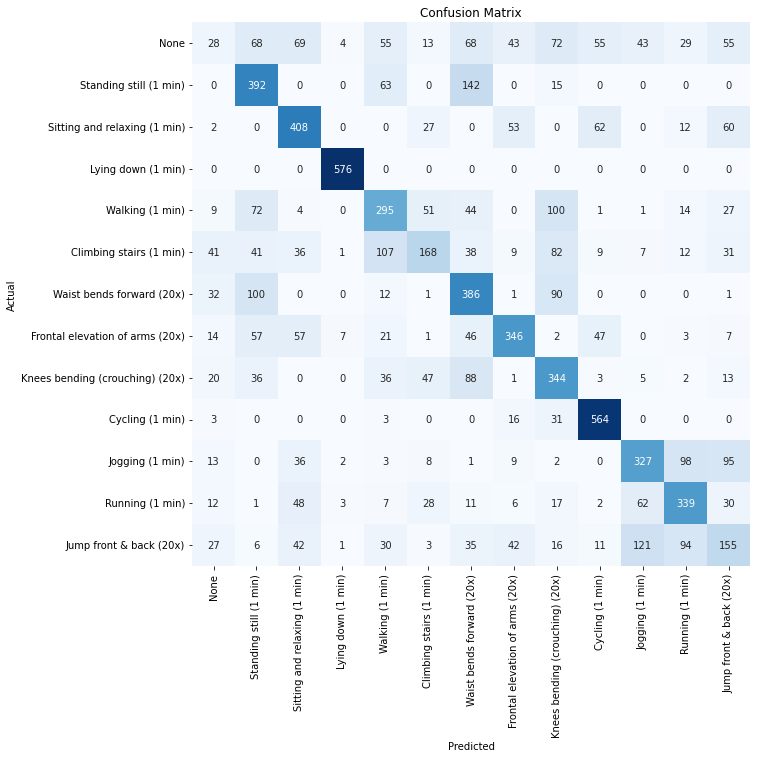

Classification Report:
----------------------
                                  precision    recall  f1-score   support

                           None       0.14      0.05      0.07       602
         Standing still (1 min)       0.51      0.64      0.57       612
   Sitting and relaxing (1 min)       0.58      0.65      0.62       624
             Lying down (1 min)       0.97      1.00      0.98       576
                Walking (1 min)       0.47      0.48      0.47       618
        Climbing stairs (1 min)       0.48      0.29      0.36       582
      Waist bends forward (20x)       0.45      0.62      0.52       623
Frontal elevation of arms (20x)       0.66      0.57      0.61       608
Knees bending (crouching) (20x)       0.45      0.58      0.50       595
                Cycling (1 min)       0.75      0.91      0.82       617
                Jogging (1 min)       0.58      0.55      0.56       594
                Running (1 min)       0.56      0.60      0.58       566
   

In [26]:
# Logistic Regression

y_pred = logistic_regression.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=list(range(13)))
clr = classification_report(y_test, y_pred, labels=list(range(13)), target_names=activity_labels.values())

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(13) + 0.5, labels=activity_labels.values(), rotation=90)
plt.yticks(ticks=np.arange(13) + 0.5, labels=activity_labels.values(), rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

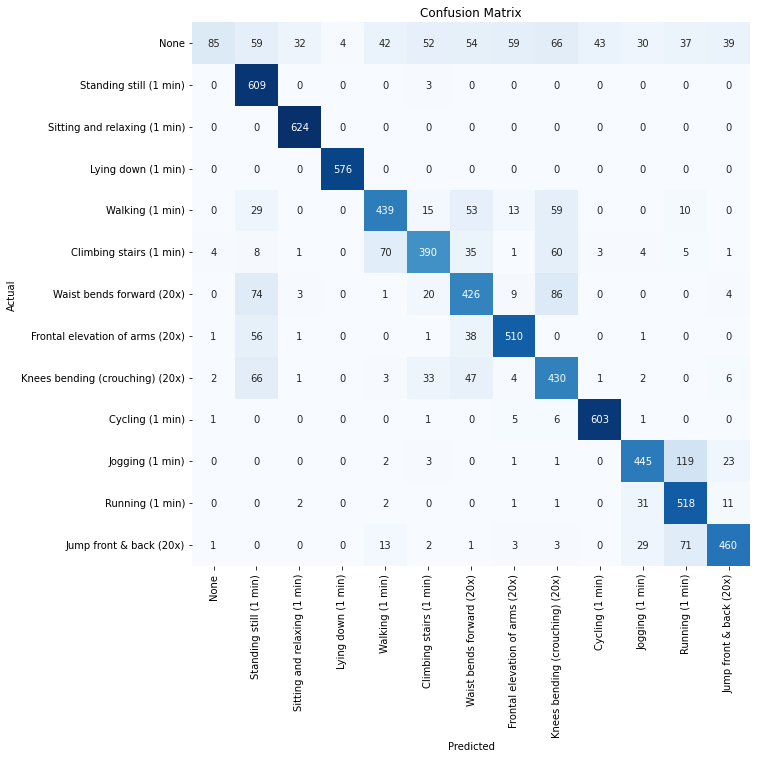

Classification Report:
----------------------
                                  precision    recall  f1-score   support

                           None       0.90      0.14      0.24       602
         Standing still (1 min)       0.68      1.00      0.81       612
   Sitting and relaxing (1 min)       0.94      1.00      0.97       624
             Lying down (1 min)       0.99      1.00      1.00       576
                Walking (1 min)       0.77      0.71      0.74       618
        Climbing stairs (1 min)       0.75      0.67      0.71       582
      Waist bends forward (20x)       0.65      0.68      0.67       623
Frontal elevation of arms (20x)       0.84      0.84      0.84       608
Knees bending (crouching) (20x)       0.60      0.72      0.66       595
                Cycling (1 min)       0.93      0.98      0.95       617
                Jogging (1 min)       0.82      0.75      0.78       594
                Running (1 min)       0.68      0.92      0.78       566
   

In [27]:
# Random Forest

y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=list(range(13)))
clr = classification_report(y_test, y_pred, labels=list(range(13)), target_names=activity_labels.values())

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(13) + 0.5, labels=activity_labels.values(), rotation=90)
plt.yticks(ticks=np.arange(13) + 0.5, labels=activity_labels.values(), rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

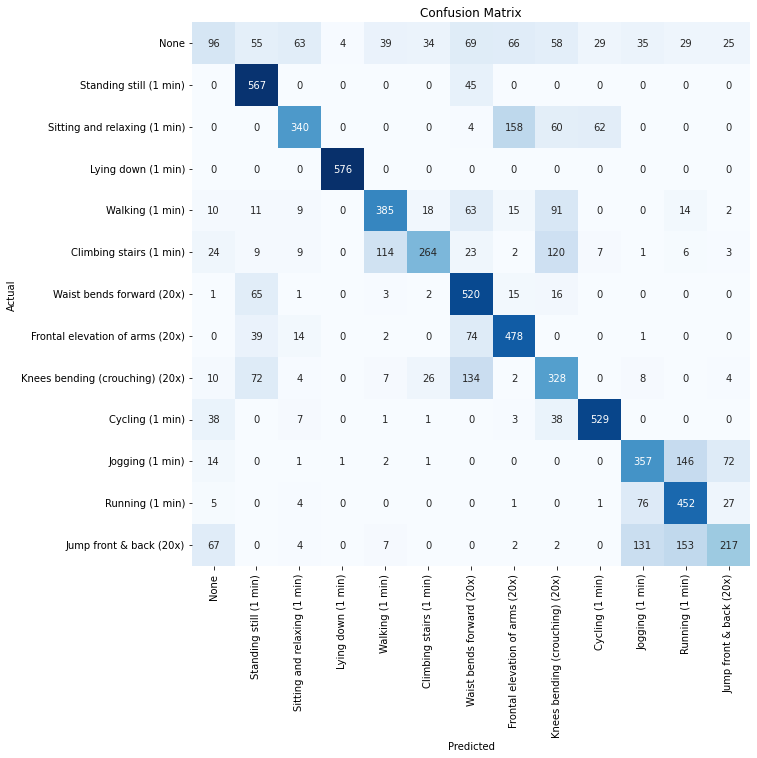

Classification Report:
----------------------
                                  precision    recall  f1-score   support

                           None       0.36      0.16      0.22       602
         Standing still (1 min)       0.69      0.93      0.79       612
   Sitting and relaxing (1 min)       0.75      0.54      0.63       624
             Lying down (1 min)       0.99      1.00      1.00       576
                Walking (1 min)       0.69      0.62      0.65       618
        Climbing stairs (1 min)       0.76      0.45      0.57       582
      Waist bends forward (20x)       0.56      0.83      0.67       623
Frontal elevation of arms (20x)       0.64      0.79      0.71       608
Knees bending (crouching) (20x)       0.46      0.55      0.50       595
                Cycling (1 min)       0.84      0.86      0.85       617
                Jogging (1 min)       0.59      0.60      0.59       594
                Running (1 min)       0.56      0.80      0.66       566
   

In [28]:
# Naive bayes

y_pred = nb.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=list(range(13)))
clr = classification_report(y_test, y_pred, labels=list(range(13)), target_names=activity_labels.values())

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(13) + 0.5, labels=activity_labels.values(), rotation=90)
plt.yticks(ticks=np.arange(13) + 0.5, labels=activity_labels.values(), rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [29]:
each_act =   2000 # number of indexes of each activity type

# Error summary

In [30]:
each_act =   2000 # number of indexes of each activity type
error_investigation = pd.DataFrame(columns=['test', 'pred', 'err'])
error_investigation['test'] = y_test
error_investigation['pred'] = y_pred_knn
error_investigation['err'] = diff_vec_knn

Failed = error_investigation[error_investigation['err'] == True]
Failed.index = range(len(Failed))
activity_labels = {
    0: "None",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)"
}
Ftest = Failed.test.value_counts()
print("Error summary:")
for i in Ftest.index :
    proc = int(1000*Ftest[i]/each_act)/10
    print(proc,"%", " ", "(#%2d" %i,")",  activity_labels[i] )

Error summary:
15.9 %   (# 0 ) None
5.0 %   (#12 ) Jump front & back (20x)
3.5 %   (#11 ) Running (1 min)
3.5 %   (# 5 ) Climbing stairs (1 min)
2.9 %   (#10 ) Jogging (1 min)
0.8 %   (# 8 ) Knees bending (crouching) (20x)
0.8 %   (# 7 ) Frontal elevation of arms (20x)
0.5 %   (# 4 ) Walking (1 min)
0.3 %   (# 6 ) Waist bends forward (20x)
0.2 %   (# 9 ) Cycling (1 min)


In [31]:
error_investigation = pd.DataFrame(columns=['test', 'pred', 'err'])
error_investigation['test'] = y_test
error_investigation['pred'] = y_pred_log
error_investigation[ 'err'] = diff_vec_log

Failed = error_investigation[error_investigation[ 'err'] == True]
Failed.index = range(len(Failed))
activity_labels = {
    0: "None",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)"
}
Ftest = Failed.test.value_counts()
print("Error summary:")
for i in Ftest.index :
    proc = int(1000*Ftest[i]/each_act)/10
    print(proc,"%", " ", "(#%2d" %i,")",  activity_labels[i] )

Error summary:
28.7 %   (# 0 ) None
21.4 %   (#12 ) Jump front & back (20x)
20.7 %   (# 5 ) Climbing stairs (1 min)
16.1 %   (# 4 ) Walking (1 min)
13.3 %   (#10 ) Jogging (1 min)
13.1 %   (# 7 ) Frontal elevation of arms (20x)
12.5 %   (# 8 ) Knees bending (crouching) (20x)
11.8 %   (# 6 ) Waist bends forward (20x)
11.3 %   (#11 ) Running (1 min)
11.0 %   (# 1 ) Standing still (1 min)
10.8 %   (# 2 ) Sitting and relaxing (1 min)
2.6 %   (# 9 ) Cycling (1 min)


In [32]:
error_investigation = pd.DataFrame(columns=['test', 'pred', 'err'])
error_investigation['test'] = y_test
error_investigation['pred'] = y_pred_rf
error_investigation[ 'err'] = diff_vec_rf

Failed = error_investigation[error_investigation[ 'err'] == True]
Failed.index = range(len(Failed))
activity_labels = {
    0: "None",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)"
}
Ftest = Failed.test.value_counts()
print("Error summary:")
for i in Ftest.index :
    proc = int(1000*Ftest[i]/each_act)/10
    print(proc,"%", " ", "(#%2d" %i,")",  activity_labels[i] )

Error summary:
25.8 %   (# 0 ) None
9.8 %   (# 6 ) Waist bends forward (20x)
9.6 %   (# 5 ) Climbing stairs (1 min)
8.9 %   (# 4 ) Walking (1 min)
8.2 %   (# 8 ) Knees bending (crouching) (20x)
7.4 %   (#10 ) Jogging (1 min)
6.1 %   (#12 ) Jump front & back (20x)
4.9 %   (# 7 ) Frontal elevation of arms (20x)
2.4 %   (#11 ) Running (1 min)
0.7 %   (# 9 ) Cycling (1 min)
0.1 %   (# 1 ) Standing still (1 min)


In [33]:
error_investigation = pd.DataFrame(columns=['test', 'pred', 'err'])
error_investigation['test'] = y_test
error_investigation['pred'] = y_pred_nb
error_investigation[ 'err'] = diff_vec_nb

Failed = error_investigation[error_investigation[ 'err'] == True]
Failed.index = range(len(Failed))
activity_labels = {
    0: "None",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)"
}
Ftest = Failed.test.value_counts()
print("Error summary:")
for i in Ftest.index :
    proc = int(1000*Ftest[i]/each_act)/10
    print(proc,"%", " ", "(#%2d" %i,")",  activity_labels[i])

Error summary:
25.3 %   (# 0 ) None
18.3 %   (#12 ) Jump front & back (20x)
15.9 %   (# 5 ) Climbing stairs (1 min)
14.2 %   (# 2 ) Sitting and relaxing (1 min)
13.3 %   (# 8 ) Knees bending (crouching) (20x)
11.8 %   (#10 ) Jogging (1 min)
11.6 %   (# 4 ) Walking (1 min)
6.5 %   (# 7 ) Frontal elevation of arms (20x)
5.7 %   (#11 ) Running (1 min)
5.1 %   (# 6 ) Waist bends forward (20x)
4.4 %   (# 9 ) Cycling (1 min)
2.2 %   (# 1 ) Standing still (1 min)


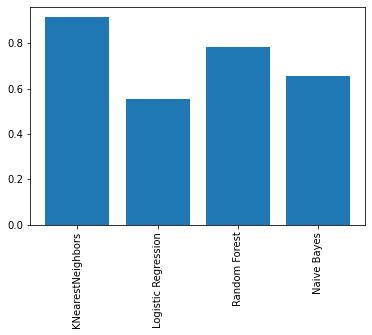

In [34]:
# Plotting the accuracy of each model: A comparision study
import numpy as np

algorithms = ["KNearestNeighbors","Logistic Regression","Random Forest","Naive Bayes"]
accuracy = [accuracy_score(y_test, y_pred_knn),accuracy_score(y_test, y_pred_log),accuracy_score(y_test, y_pred_rf),accuracy_score(y_test, y_pred_nb)]

y_pos = np.arange(len(algorithms))

plt.bar(y_pos, accuracy)
plt.xticks(y_pos, algorithms,rotation=90)
plt.show()